# Apartment data parsing 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import re
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

C:\Users\Gregory\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

### Creating raw data frame 

In [4]:
raw_data = pd.read_csv('aptlisting.csv')

raw_data = raw_data[1:len(raw_data):2].reset_index(drop=True)

raw_data = raw_data.drop(['SqFt','floorplan', 'incm_restr', 'site'], axis = 1)

raw_data.head()



,address,age,bath,bedrooms,crime,description,features,neighborhood,price
0,"Brooklyn, NY, 11226, (",5 days on Trulia,1 full Bathroom,1 Bedroom,Low,MASSIVE!! GUT RENO SUNNY 1 bedroom apartment!!...,"Price: $1,595; 1 Bedroom; 1 full Bathroom; Mul...",East Flatbush,"$1,595/mo"
1,"Brooklyn, NY, 11216, (",5 days on Trulia,1 full Bathroom,1 Bedroom,Low,Come check out this clean spacious and comfort...,"Price: $1,850; 1 Bedroom; 1 full Bathroom; Mul...",Bedford - Stuyvesant,"$1,850/mo"
2,"Brooklyn, NY, 11231, (",5 days on Trulia,1 full Bathroom,3 Bedrooms,Lowest,"Spacious, sun-drenched 3 bedroom in the Carrol...","Price: $2,700; 3 Bedrooms; 1 full Bathroom; Mu...",Carroll Gardens,"$2,700/mo"
3,"Brooklyn, NY, 11218, (",5 days on Trulia,1 full Bathroom,1 Bedroom,Low,REDUCED BROKER'S FEE! Large and Clean 1bedroom...,"Price: $1,675; 1 Bedroom; 1 full Bathroom; Mul...",Kensington & Parkville,"$1,675/mo"
4,"420 Lexington Ave, Brooklyn, NY, 11221",180+ days on Trulia,1 - 2 full Bathrooms,2 - 3 Bedrooms,High,"NO FEE, GUARANTORS ACCEPTED.Bed-Stuy Redefined...",; Features – 410-420 Lexington Avenue; *; ; ; ...,Bedford - Stuyvesant,"$2,650 - $3,100/mo"


### Turn age, bath, bed and price into numeric fields

In [5]:
age = [re.findall(r'\d+', x) for x in raw_data.age]
age
raw_data.age = [int(x[0]) for x in age]

In [7]:
raw_data.head()

,address,age,bath,bedrooms,crime,description,features,neighborhood,price
0,"Brooklyn, NY, 11226, (",5,1 full Bathroom,1 Bedroom,Low,MASSIVE!! GUT RENO SUNNY 1 bedroom apartment!!...,"Price: $1,595; 1 Bedroom; 1 full Bathroom; Mul...",East Flatbush,"$1,595/mo"
1,"Brooklyn, NY, 11216, (",5,1 full Bathroom,1 Bedroom,Low,Come check out this clean spacious and comfort...,"Price: $1,850; 1 Bedroom; 1 full Bathroom; Mul...",Bedford - Stuyvesant,"$1,850/mo"
2,"Brooklyn, NY, 11231, (",5,1 full Bathroom,3 Bedrooms,Lowest,"Spacious, sun-drenched 3 bedroom in the Carrol...","Price: $2,700; 3 Bedrooms; 1 full Bathroom; Mu...",Carroll Gardens,"$2,700/mo"
3,"Brooklyn, NY, 11218, (",5,1 full Bathroom,1 Bedroom,Low,REDUCED BROKER'S FEE! Large and Clean 1bedroom...,"Price: $1,675; 1 Bedroom; 1 full Bathroom; Mul...",Kensington & Parkville,"$1,675/mo"
4,"420 Lexington Ave, Brooklyn, NY, 11221",180,1 - 2 full Bathrooms,2 - 3 Bedrooms,High,"NO FEE, GUARANTORS ACCEPTED.Bed-Stuy Redefined...",; Features – 410-420 Lexington Avenue; *; ; ; ...,Bedford - Stuyvesant,"$2,650 - $3,100/mo"


In [8]:
raw_data.bath.unique()

array(['1 full Bathroom', '1 - 2 full Bathrooms', '2 full Bathrooms',
       '1 full, 1 partial Bathrooms', '3 full Bathrooms',
       '1 - 1.5 full, 1 partial Bathrooms', '2 full, 1 partial Bathrooms',
       '0 - 1 full Bathroom', '1.5 full, 1 partial Bathrooms',
       '1 full, 5 partial Bathrooms', '2 full, 2 partial Bathrooms',
       '3 full, 1 partial Bathrooms'], dtype=object)

In [9]:
baths = pd.DataFrame([re.search(r'[1234]', x).group(0) for x in raw_data.bath])

In [10]:
baths[0].unique()

array(['1', '2', '3'], dtype=object)

In [11]:
type(raw_data.bath)

pandas.core.series.Series

In [12]:
raw_data.bath = [re.search(r'[123]', x).group(0) for x in raw_data.bath]
raw_data.head()

,address,age,bath,bedrooms,crime,description,features,neighborhood,price
0,"Brooklyn, NY, 11226, (",5,1,1 Bedroom,Low,MASSIVE!! GUT RENO SUNNY 1 bedroom apartment!!...,"Price: $1,595; 1 Bedroom; 1 full Bathroom; Mul...",East Flatbush,"$1,595/mo"
1,"Brooklyn, NY, 11216, (",5,1,1 Bedroom,Low,Come check out this clean spacious and comfort...,"Price: $1,850; 1 Bedroom; 1 full Bathroom; Mul...",Bedford - Stuyvesant,"$1,850/mo"
2,"Brooklyn, NY, 11231, (",5,1,3 Bedrooms,Lowest,"Spacious, sun-drenched 3 bedroom in the Carrol...","Price: $2,700; 3 Bedrooms; 1 full Bathroom; Mu...",Carroll Gardens,"$2,700/mo"
3,"Brooklyn, NY, 11218, (",5,1,1 Bedroom,Low,REDUCED BROKER'S FEE! Large and Clean 1bedroom...,"Price: $1,675; 1 Bedroom; 1 full Bathroom; Mul...",Kensington & Parkville,"$1,675/mo"
4,"420 Lexington Ave, Brooklyn, NY, 11221",180,1,2 - 3 Bedrooms,High,"NO FEE, GUARANTORS ACCEPTED.Bed-Stuy Redefined...",; Features – 410-420 Lexington Avenue; *; ; ; ...,Bedford - Stuyvesant,"$2,650 - $3,100/mo"


In [14]:
raw_data.bedrooms.unique()

array(['1 Bedroom', '3 Bedrooms', '2 - 3 Bedrooms', '2 Bedrooms',
       '4 Bedrooms', '5 Bedrooms', 'Studio - 2 Bedrooms',
       'Studio - 3 Bedrooms', 'Studio - 1 Bedroom', '6 Bedrooms',
       '1 - 2 Bedrooms', '8 Bedrooms'], dtype=object)

In [15]:
raw_data.loc[raw_data['bedrooms'].isin(['5 Bedrooms', '6 Bedrooms', '8 Bedrooms'])]

,address,age,bath,bedrooms,crime,description,features,neighborhood,price
17,"Brooklyn, NY, 11231, (",35,3,5 Bedrooms,Lowest,Live in the ultimate duplex in PRIME Carroll G...,"Price: $6,212; 5 Bedrooms; 3 full Bathrooms; M...",Carroll Gardens,"$6,212/mo"
53,"Brooklyn, NY, 11228, (",17,2,5 Bedrooms,Lowest,Gut renovated 5 bedroom / 2 Full bathroom apar...,"Price: $3,300; Deposit:\r\n ...",Dyker Heights,"$3,300/mo"
77,"Brooklyn, NY, 11216, (",3,2,6 Bedrooms,Highest,ASAP Move InBrand New Cheap Private Rooms avai...,Price: $800; Deposit:\r\n ...,Bedford - Stuyvesant,$800/mo
107,"Brooklyn, NY, 11228, (",5,3,6 Bedrooms,Lowest,Newly remodeled,"Price: $3,200; Deposit:\r\n ...",Dyker Heights,"$3,200/mo"
188,"Brooklyn, NY, 11221, (",5,2,5 Bedrooms,Highest,Very unique *TWO LEVEL loft space* with so muc...,"Price: $4,500; 5 Bedrooms; 2 full Bathrooms; M...",Bushwick,"$4,500/mo"
214,"Brooklyn, NY, 11221, (",9,2,5 Bedrooms,Low,ROOMMATES WANTEDMOVE-IN DATE: MARCH 1STLOCATIO...,Price: $800; Deposit:\r\n ...,Bushwick,$800/mo
243,"Brooklyn, NY, 11206, (",8,2,6 Bedrooms,High,Williamsburg~Amazing 6BR duplex~2 Baths~Backya...,"Price: $1,200; Deposit:\r\n ...",Williamsburg,"$1,200/mo"
331,"Brooklyn, NY, 11206, (",3,2,6 Bedrooms,High,4 BedroomPLUS SEPARATE COMMERCIAL SPACE IN BAC...,"Price: $5,958; 6 Bedrooms; 2 full, 2 partial B...",Bedford - Stuyvesant,"$5,958/mo"
398,"Brooklyn, NY, 11219, (",1,1,5 Bedrooms,Lowest,"Newly Renovated, very convenient, close to sub...","Price: $2,400; 5 Bedrooms; 1 full Bathroom; Mu...",Borough Park,"$2,400/mo"
468,"Brooklyn, NY, 11238, (",21,2,8 Bedrooms,High,Rooms are available in a lovely Newly renovate...,Price: $775; 8 Bedrooms; 2 full Bathrooms; Mul...,Prospect Heights,$775/mo


In [16]:
beds = pd.DataFrame([re.search(r'\d+', x).group(0) for x in raw_data.bedrooms])

In [17]:
beds[0].unique()

array(['1', '3', '2', '4', '5', '6', '8'], dtype=object)

In [18]:
raw_data.bedrooms = [re.search(r'\d+', x).group(0) for x in raw_data.bedrooms]
raw_data.head()

,address,age,bath,bedrooms,crime,description,features,neighborhood,price
0,"Brooklyn, NY, 11226, (",5,1,1,Low,MASSIVE!! GUT RENO SUNNY 1 bedroom apartment!!...,"Price: $1,595; 1 Bedroom; 1 full Bathroom; Mul...",East Flatbush,"$1,595/mo"
1,"Brooklyn, NY, 11216, (",5,1,1,Low,Come check out this clean spacious and comfort...,"Price: $1,850; 1 Bedroom; 1 full Bathroom; Mul...",Bedford - Stuyvesant,"$1,850/mo"
2,"Brooklyn, NY, 11231, (",5,1,3,Lowest,"Spacious, sun-drenched 3 bedroom in the Carrol...","Price: $2,700; 3 Bedrooms; 1 full Bathroom; Mu...",Carroll Gardens,"$2,700/mo"
3,"Brooklyn, NY, 11218, (",5,1,1,Low,REDUCED BROKER'S FEE! Large and Clean 1bedroom...,"Price: $1,675; 1 Bedroom; 1 full Bathroom; Mul...",Kensington & Parkville,"$1,675/mo"
4,"420 Lexington Ave, Brooklyn, NY, 11221",180,1,2,High,"NO FEE, GUARANTORS ACCEPTED.Bed-Stuy Redefined...",; Features – 410-420 Lexington Avenue; *; ; ; ...,Bedford - Stuyvesant,"$2,650 - $3,100/mo"


In [19]:
raw_data.bedrooms.unique()

array(['1', '3', '2', '4', '5', '6', '8'], dtype=object)

In [57]:
price = [''.join(re.findall(r'\d+', x)) for x in raw_data.price]
raw_data.price = [i[:4] for i in price]
print(raw_data.head())
raw_data.shape

                                  address  age bath bedrooms   crime  \
0                  Brooklyn, NY, 11226, (    5    1        1     Low   
1                  Brooklyn, NY, 11216, (    5    1        1     Low   
2                  Brooklyn, NY, 11231, (    5    1        3  Lowest   
3                  Brooklyn, NY, 11218, (    5    1        1     Low   
4  420 Lexington Ave, Brooklyn, NY, 11221  180    1        2    High   

                                         description  \
0  MASSIVE!! GUT RENO SUNNY 1 bedroom apartment!!...   
1  Come check out this clean spacious and comfort...   
2  Spacious, sun-drenched 3 bedroom in the Carrol...   
3  REDUCED BROKER'S FEE! Large and Clean 1bedroom...   
4  NO FEE, GUARANTORS ACCEPTED.Bed-Stuy Redefined...   

                                            features            neighborhood  \
0  Price: $1,595; 1 Bedroom; 1 full Bathroom; Mul...           East Flatbush   
1  Price: $1,850; 1 Bedroom; 1 full Bathroom; Mul...    Bedford - Stuy

(2032, 9)

In [58]:
price = raw_data.price[raw_data.price != '']
price.astype(int).agg(['min', 'mean', 'max']).astype(int)

min      600
mean    2546
max     9230
Name: price, dtype: int32

## Create data frame for regression

In [59]:
apt_reg = pd.DataFrame(raw_data[['age', 'bath', 'bedrooms', 'price', 'neighborhood', 'crime']])
apt_reg = apt_reg[apt_reg.price != '']

apt_reg.head()


,age,bath,bedrooms,price,neighborhood,crime
0,5,1,1,1595,East Flatbush,Low
1,5,1,1,1850,Bedford - Stuyvesant,Low
2,5,1,3,2700,Carroll Gardens,Lowest
3,5,1,1,1675,Kensington & Parkville,Low
4,180,1,2,2650,Bedford - Stuyvesant,High


In [60]:
apt_reg.shape

(2031, 6)

#### Change price, bedrooms and baths to integers

In [61]:
apt_reg.price = apt_reg.price.astype(int)

In [62]:
apt_reg.bedrooms = apt_reg.bedrooms.astype(int)

In [63]:
apt_reg.bath = apt_reg.bath.astype(int)

#### Create dummies for crime rate

In [64]:
apt_reg['lowestCrime'] = (apt_reg.crime == 'Lowest').astype(int)
apt_reg['lowCrime'] = (apt_reg.crime == 'Low').astype(int)
apt_reg['highCrime'] = (apt_reg.crime == 'High').astype(int)
apt_reg.head()

,age,bath,bedrooms,price,neighborhood,crime,lowestCrime,lowCrime,highCrime
0,5,1,1,1595,East Flatbush,Low,0,1,0
1,5,1,1,1850,Bedford - Stuyvesant,Low,0,1,0
2,5,1,3,2700,Carroll Gardens,Lowest,1,0,0
3,5,1,1,1675,Kensington & Parkville,Low,0,1,0
4,180,1,2,2650,Bedford - Stuyvesant,High,0,0,1


### Brief EDA

In [65]:
apt_beds = apt_reg.groupby('bedrooms')
aptbedagg = apt_beds.price.agg(['max', 'mean', 'min'])
aptbedagg = aptbedagg[:4]
aptbedagg

,max,mean,min
bedrooms,,,
1,5270,2229.572040,725
2,7850,2691.325428,1100
3,7911,2751.258065,650
4,9230,2732.604651,600


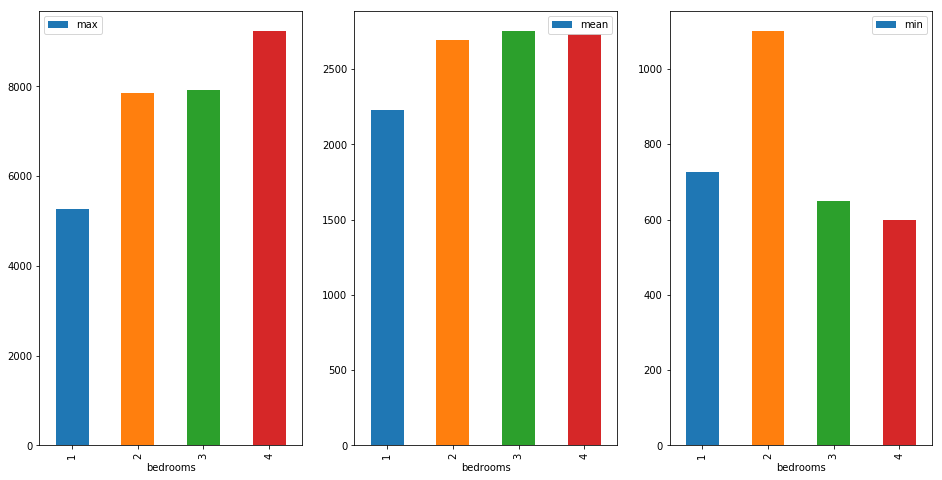

In [66]:
fig, axs = plt.subplots(1, 3, sharey=False)
aptbedagg.plot(kind='bar', y='max',  ax=axs[0], figsize=(16, 8))
aptbedagg.plot(kind='bar', y='mean',  ax=axs[1])
aptbedagg.plot(kind='bar', y='min',  ax=axs[2])

In [88]:
apthood = apt_reg.groupby('neighborhood')
print(apthood.price.mean().astype(int))
min(apthood.price.mean().astype(int))

neighborhood
Bath Beach                             2038
Bay Ridge & Fort Hamilton              2103
Bedford - Stuyvesant                   2292
Bensonhurst                            1807
Bergen Beach                           2240
Boerum Hill                            3114
Borough Park                           2157
Brighton Beach                         2606
Brooklyn Heights                       3978
Brownsville                            1677
Bushwick                               2314
Canarsie                               2137
Carroll Gardens                        3422
Clinton Hill                           2711
Cobble Hill                            3083
Columbia Street Waterfront District    2600
Coney Island                           2204
Crown Heights                          2509
Cypress Hills                          2198
Downtown Brooklyn                      3610
Dyker Heights                          2323
East Flatbush                          1913
East New York      

1677

#### Create dummies for neighborhoods

In [95]:
Hood = pd.get_dummies(apt_reg.neighborhood, drop_first=False, dummy_na=False)

Hood.loc[:,Hood.columns!='Brownsville'].head()

,Bath Beach,Bay Ridge & Fort Hamilton,Bedford - Stuyvesant,Bensonhurst,Bergen Beach,Boerum Hill,Borough Park,Brighton Beach,Brooklyn Heights,Bushwick,...,Prospect Lefferts Gardens,Prospect Park South,Red Hook,Ridgewood,Sea Gate,Sheepshead Bay,Sunset Park,Vinegar Hill,Williamsburg,Windsor Terrace
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Regression

In [97]:
X =pd.concat([apt_reg.loc[:,['age', 'bath', 'bedrooms', 'lowestCrime', 'lowCrime', 'highCrime']],
              Hood.loc[:,Hood.columns!='Brownsville']], axis=1)
X=sm.add_constant(X)
mod = sm.OLS(apt_reg.price, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     32.25
Date:                Mon, 09 Apr 2018   Prob (F-statistic):          4.73e-229
Time:                        23:41:14   Log-Likelihood:                -16219.
No. Observations:                2031   AIC:                         3.255e+04
Df Residuals:                    1976   BIC:                         3.286e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 236.9014    266.013      0.891      0.373    -284.793     758.596
age                                     1.5520      0.674      2.301      0.021       0.229       2.875
bath                                  711.1585     41.546     17.117      0.000     629.679     792.638
bedrooms                              184.6081     20.374      9.061      0.000     144.652     224.564
lowestCrime                           161.9924     79.121      2.047      0.041       6.823     317.162
lowCrime                               11.8988     68.596      0.173      0.862    -122.628     146.426
highCrime                              34.1149     73.176      0.466      0.641    -109.395     177.625
Bath Beach                            335.2892    282.823      1.186      0.236    -219.374     889.952
Bay Ridge & Fort Hamilton             566.4363    273.643      2.070      0.039      29.777    1103.096
Bedford - Stuyvesant                  709.2623    259.103      2.737      0.006     201.119    1217.405
Bensonhurst                           281.1798    278.488      1.010      0.313    -264.981     827.341
Bergen Beach                          376.0933    338.900      1.110      0.267    -288.545    1040.731
Boerum Hill                          1692.5719    290.774      5.821      0.000    1122.316    2262.828
Borough Park                          410.8547    304.220      1.351      0.177    -185.770    1007.480
Brighton Beach                        870.3317    272.189      3.198      0.001     336.524    1404.139
Brooklyn Heights                     2298.0510    293.925      7.818      0.000    1721.615    2874.487
Bushwick                              652.5236    261.408      2.496      0.013     139.860    1165.187
Canarsie                              453.7625    317.984      1.427      0.154    -169.856    1077.381
Carroll Gardens                      1743.0214    289.892      6.013      0.000    1174.495    2311.548
Clinton Hill                         1225.1670    280.118      4.374      0.000     675.810    1774.524
Cobble Hill                          1291.1595    326.709      3.952      0.000     650.429    1931.890
Columbia Street Waterfront District  1303.7876    767.153      1.700      0.089    -200.726    2808.302
Coney Island                          732.6261    330.955      2.214      0.027      83.568    1381.684
Crown Heights                        1048.1577    272.435      3.847      0.000     513.868    1582.448
Cypress Hills                         493.1602    315.995      1.561      0.119    -126.558    1112.878
Downtown Brooklyn                    2076.5199    277.794      7.475      0.000    1531.721    2621.319
Dyker Heights                         462.3552    290.592      1.59

In [218]:
len(apt_reg.neighborhood.unique())

49

## Wordclouds

AttributeError: 'AxesImage' object has no attribute 'savefig'

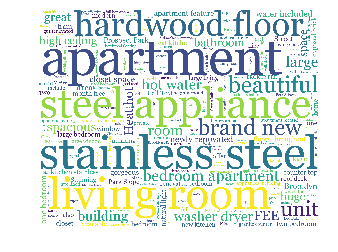

In [53]:
wordcloud_final = WordCloud(
     font_path='C://Windows//Fonts/georgia.ttf',
     background_color='white',
     width=1800,
     height=1400,
     #mask=mask
 ).generate(' '.join(raw_data.description))
clod = plt.imshow(wordcloud_final)
plt.axis("off")
clod.savefig('wdcld_desc.pdf', bbox_inches='tight')
#plt.axis("off")
#plt.show()

plt.close('clod')

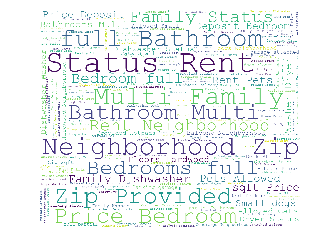

In [94]:
wordcloud_final = WordCloud(
     font_path='C:\\Windows\\Fonts\\cour.ttf',
     background_color='white',
     width=1200,
     height=1000,
     #mask=mask
 ).generate(' '.join(raw_data.features))
plt.imshow(wordcloud_final)
plt.axis("off")
plt.show()